In [1]:
# importing the libraries

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import yfinance as yf


from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from datetime import date

plt.style.use('fivethirtyeight')

In [2]:
start_date = datetime.datetime(2010, 1, 1)
end_date = date.today()

df = yf.download("AAPL", start=start_date, end=end_date)

df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.496295,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.507526,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.404015,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.392176,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.434672,447610800


In [3]:
# Checking the number of rows and columns
df.shape

(3405, 6)

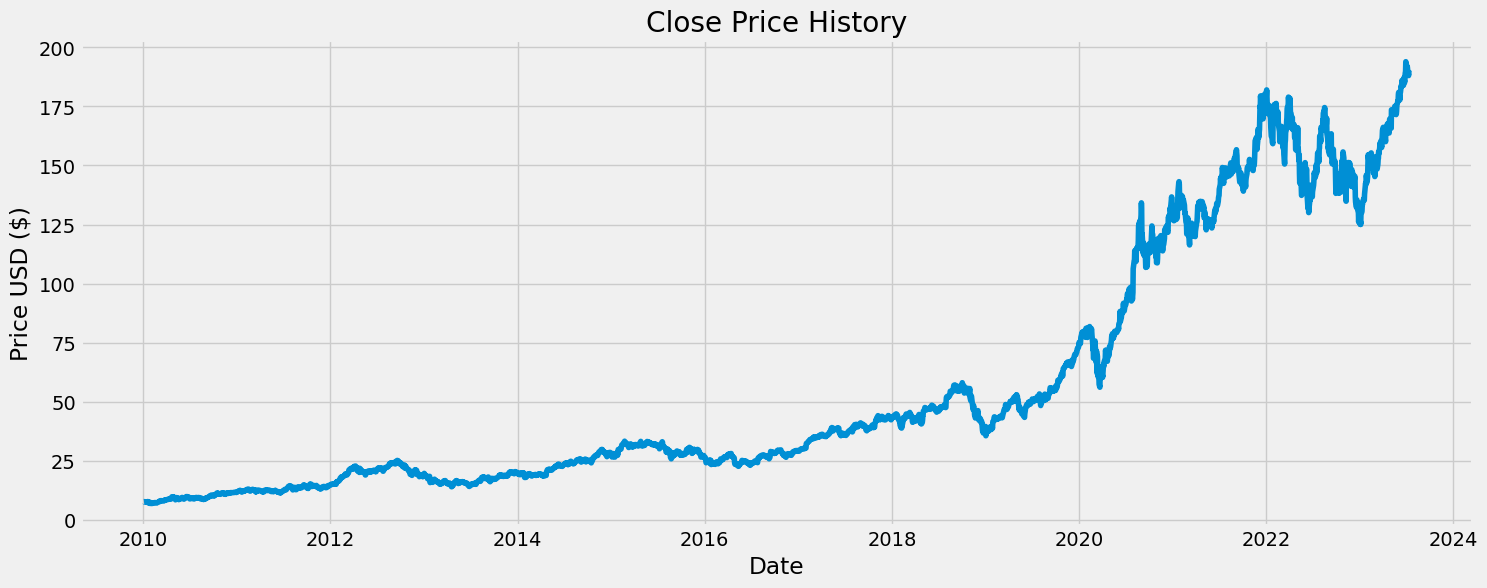

In [4]:
# Visualize the closing price history
plt.figure(figsize=(16, 6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Price USD ($)')
plt.show()

In [5]:
# Create a new dataframe with only 'Close' column
data = df.filter(['Close'])

# Converte the dataframe to np array
dataset = data.values

#Get the number of rows to train the models on. Using 80% of the data for training
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

2724

In [6]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00419155],
       [0.00426217],
       [0.0036113 ],
       ...,
       [0.97755346],
       [0.9816686 ],
       [0.98247031]])

In [7]:
# Create the training dataset
# Create the scaled the training dataset
train_data = scaled_data[0:training_data_len, :]

# Split the data into x_train, y_train
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

In [8]:
# Converte the x_train, y_train to np array
x_train, y_train = np.array(x_train), np.array(y_train)

In [9]:
# Checking the shape
x_train.shape

(2664, 60)

In [10]:
# Reshape the data into 3D for LSTM model
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape


(2664, 60, 1)

In [11]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [12]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [13]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2664/2664 [==============================] - 52s 19ms/step - loss: 3.6538e-04


In [14]:
# Create the testing dataset
test_data = scaled_data[training_data_len - 60: , :]

# Create the datasets x_test, y_test
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i - 6:i, 0])
    
# Converte the data to a np array
x_test = np.array(x_test)

In [17]:
# Reshape the data into 3D
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(681, 6, 1)

In [16]:
# Models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

ValueError: in user code:

    File "e:\git\StockPricePrediction-NN\.venv\Lib\site-packages\keras\engine\training.py", line 2169, in predict_function  *
        return step_function(self, iterator)
    File "e:\git\StockPricePrediction-NN\.venv\Lib\site-packages\keras\engine\training.py", line 2155, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "e:\git\StockPricePrediction-NN\.venv\Lib\site-packages\keras\engine\training.py", line 2143, in run_step  **
        outputs = model.predict_step(data)
    File "e:\git\StockPricePrediction-NN\.venv\Lib\site-packages\keras\engine\training.py", line 2111, in predict_step
        return self(x, training=False)
    File "e:\git\StockPricePrediction-NN\.venv\Lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "e:\git\StockPricePrediction-NN\.venv\Lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 60, 1), found shape=(None, 6, 1)
